# 논리 게이트

In [1]:
def AND_gate(x1, x2):
    w1=0.5
    w2=0.5
    b=-0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [2]:
def NAND_gate(x1, x2):
    w1=-0.5
    w2=-0.5
    b=0.7
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

In [3]:
def OR_gate(x1, x2):
    w1=0.6
    w2=0.6
    b=-0.5
    result = x1*w1 + x2*w2 + b
    if result <= 0:
        return 0
    else:
        return 1

# XOR 단층 퍼셉트론

In [9]:
import torch
import torch.nn as nn


X = torch.FloatTensor([[0, 0], [0, 1], [1, 0], [1, 1]])
Y = torch.FloatTensor([[0], [1], [1], [0]])

In [11]:
linear = nn.Linear(2, 1, bias=True)
sigmoid = nn.Sigmoid()
model = nn.Sequential(linear, sigmoid)

In [12]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1)

for step in range(10001): 
    optimizer.zero_grad()
    hypothesis = model(X)

    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if step % 100 == 0: 
        print(step, cost.item())

0 0.7093762159347534
100 0.6931471824645996
200 0.6931471824645996
300 0.6931471824645996
400 0.6931471824645996
500 0.6931471824645996
600 0.6931471824645996
700 0.6931471824645996
800 0.6931471824645996
900 0.6931471824645996
1000 0.6931471824645996
1100 0.6931471824645996
1200 0.6931471824645996
1300 0.6931471824645996
1400 0.6931471824645996
1500 0.6931471824645996
1600 0.6931471824645996
1700 0.6931471824645996
1800 0.6931471824645996
1900 0.6931471824645996
2000 0.6931471824645996
2100 0.6931471824645996
2200 0.6931471824645996
2300 0.6931471824645996
2400 0.6931471824645996
2500 0.6931471824645996
2600 0.6931471824645996
2700 0.6931471824645996
2800 0.6931471824645996
2900 0.6931471824645996
3000 0.6931471824645996
3100 0.6931471824645996
3200 0.6931471824645996
3300 0.6931471824645996
3400 0.6931471824645996
3500 0.6931471824645996
3600 0.6931471824645996
3700 0.6931471824645996
3800 0.6931471824645996
3900 0.6931471824645996
4000 0.6931471824645996
4100 0.6931471824645996
4200

In [13]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()

print(hypothesis, predicted, accuracy)

tensor([[0.5000],
        [0.5000],
        [0.5000],
        [0.5000]]) tensor([[0.],
        [0.],
        [0.],
        [0.]]) tensor(0.5000)


In [15]:
model = nn.Sequential(
          nn.Linear(2, 10, bias=True), 
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), 
          nn.Sigmoid(),
          nn.Linear(10, 10, bias=True), 
          nn.Sigmoid(),
          nn.Linear(10, 1, bias=True),
          nn.Sigmoid()
          )

# XOR 다층 퍼셉트론

In [16]:
criterion = torch.nn.BCELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=1)  

In [17]:
for epoch in range(10001):
    optimizer.zero_grad()
    hypothesis = model(X)

    cost = criterion(hypothesis, Y)
    cost.backward()
    optimizer.step()

    if epoch % 100 == 0:
        print(epoch, cost.item())

0 0.7049118876457214
100 0.6931425333023071
200 0.6931424140930176
300 0.6931421756744385
400 0.6931419968605042
500 0.6931418180465698
600 0.6931415796279907
700 0.6931414604187012
800 0.6931412816047668
900 0.6931410431861877
1000 0.6931408047676086
1100 0.6931406855583191
1200 0.69314044713974
1300 0.6931401491165161
1400 0.6931399703025818
1500 0.6931396722793579
1600 0.6931394338607788
1700 0.6931390762329102
1800 0.6931387782096863
1900 0.6931385397911072
2000 0.6931382417678833
2100 0.6931378841400146
2200 0.6931375861167908
2300 0.6931372880935669
2400 0.6931368708610535
2500 0.69313645362854
2600 0.6931360960006714
2700 0.693135678768158
2800 0.6931352615356445
2900 0.6931348443031311
3000 0.6931343078613281
3100 0.6931338310241699
3200 0.6931332945823669
3300 0.6931328177452087
3400 0.693132221698761
3500 0.6931316256523132
3600 0.6931309700012207
3700 0.6931302547454834
3800 0.6931295394897461
3900 0.6931287050247192
4000 0.6931278705596924
4100 0.6931270956993103
4200 0.693

In [18]:
with torch.no_grad():
    hypothesis = model(X)
    predicted = (hypothesis > 0.5).float()
    accuracy = (predicted == Y).float().mean()

print(hypothesis, predicted, accuracy)

tensor([[3.6249e-04],
        [9.9947e-01],
        [9.9949e-01],
        [6.2882e-04]]) tensor([[0.],
        [1.],
        [1.],
        [0.]]) tensor(1.)


# 활성화 함수

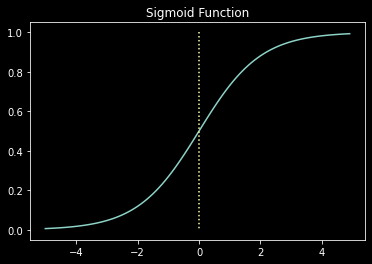

In [20]:
import matplotlib.pyplot as plt
import numpy as np

plt.style.use("dark_background")

def sigmoid(x):
    return 1/(1+np.exp(-x))
x = np.arange(-5.0, 5.0, 0.1)
y = sigmoid(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,0.0], ':') 
plt.title('Sigmoid Function')
plt.show()

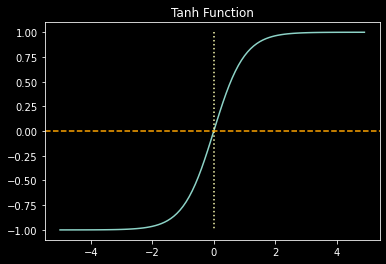

In [21]:
x = np.arange(-5.0, 5.0, 0.1)
y = np.tanh(x)

plt.plot(x, y)
plt.plot([0,0],[1.0,-1.0], ':')
plt.axhline(y=0, color='orange', linestyle='--')
plt.title('Tanh Function')
plt.show()

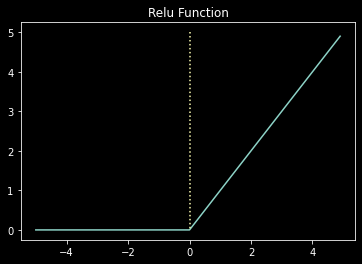

In [22]:
def relu(x):
    return np.maximum(0, x)

x = np.arange(-5.0, 5.0, 0.1)
y = relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Relu Function')
plt.show()

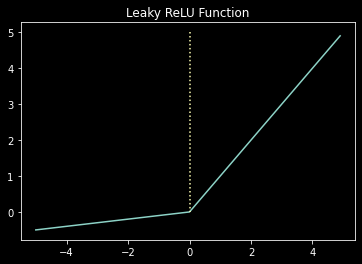

In [24]:
a=0.1

def leaky_relu(x):
    return np.maximum(a*x, x)

x = np.arange(-5.0, 5.0, 0.1)
y = leaky_relu(x)

plt.plot(x, y)
plt.plot([0,0],[5.0,0.0], ':')
plt.title('Leaky ReLU Function')
plt.show()

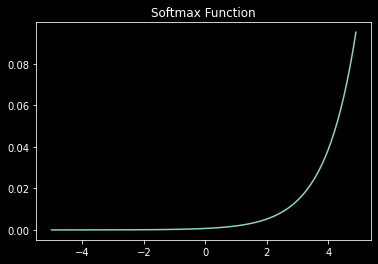

In [25]:
x = np.arange(-5.0, 5.0, 0.1) 
y = np.exp(x) / np.sum(np.exp(x))

plt.plot(x, y)
plt.title('Softmax Function')
plt.show()

# 손글씨 분류

In [26]:
from sklearn.datasets import load_digits
digits = load_digits()

In [27]:
digits = load_digits()

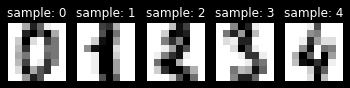

In [28]:
images_and_labels = list(zip(digits.images, digits.target))
for index, (image, label) in enumerate(images_and_labels[:5]): 
    plt.subplot(2, 5, index + 1)
    plt.axis('off')
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title('sample: %i' % label)

In [29]:
X = digits.data
Y = digits.target

In [30]:
from torch import optim

model = nn.Sequential(
    nn.Linear(64, 32), 
    nn.ReLU(),
    nn.Linear(32, 16), 
    nn.ReLU(),
    nn.Linear(16, 10) 
)

In [31]:
X = torch.tensor(X, dtype=torch.float32)
Y = torch.tensor(Y, dtype=torch.int64)

In [32]:
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters())
losses = []

In [33]:
for epoch in range(100):
  optimizer.zero_grad()
  y_pred = model(X)
  loss = loss_fn(y_pred, Y)
  loss.backward()
  optimizer.step()

  if epoch % 10 == 0:
    print('Epoch {:4d}/{} Cost: {:.6f}'.format(
            epoch, 100, loss.item()
        ))

  losses.append(loss.item())

Epoch    0/100 Cost: 2.614926
Epoch   10/100 Cost: 2.128323
Epoch   20/100 Cost: 1.857612
Epoch   30/100 Cost: 1.551336
Epoch   40/100 Cost: 1.204847
Epoch   50/100 Cost: 0.835781
Epoch   60/100 Cost: 0.553307
Epoch   70/100 Cost: 0.394408
Epoch   80/100 Cost: 0.303666
Epoch   90/100 Cost: 0.246762


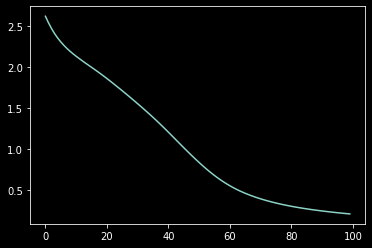

In [34]:
plt.plot(losses)